LGMVIP-DataScience Internship - January 2022

Beginner level

TASK-2 Stock Market Prediction And Forecasting Using Stacked LSTM

Done By LAKSHMAN K.R

dataset link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

dataset used here : stocks.csv


Importing the Libraries

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Uploading dataset

---



In [2]:
stock = pd.read_csv( "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

Dataset Summarization 


---



In [3]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
stock.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
stock.tail(7)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
stock.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


Resetting the data 

---



In [7]:
stock1=stock.reset_index()['Close']
stock1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Plotting the graph of Stocks when Close 

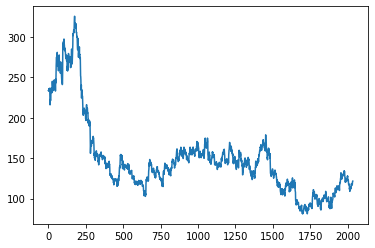

In [8]:
plt.plot(stock['Close'])

Getting an Idea about the features of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5719a88650>,
      dtype=object)

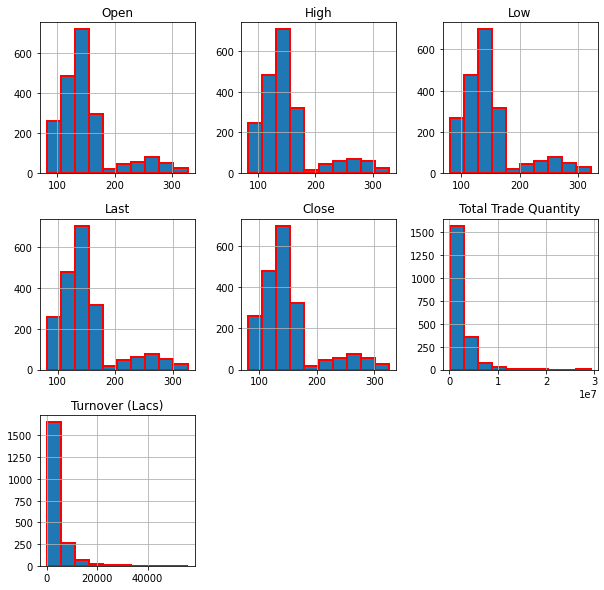

In [9]:
stock.hist(edgecolor='Red',linewidth=2,figsize=(10,10))

Scalling 

---



In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
stock1 = scaler.fit_transform(np.array(stock1).reshape(-1,1))
stock1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting Data into Train and Test 

---



In [11]:
training_size = int(len(stock1)*0.70)
test_size = len(stock1) - training_size
train_data = stock1[0:training_size,:]
test_data = stock1[training_size:len(stock1), :1]

Converting the values into a Dataset Matrix for LSTM

---



In [12]:

def newdataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = newdataset(train_data, time_step)
X_test, y_test = newdataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

Reshape the Train and Test data for LSTM 

---



In [15]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Importing from Tensorflow 


---



In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


Building the Model

---



In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
19/19 [==============================] - 8s 188ms/step - loss: 0.0224 - val_loss: 0.0025
Epoch 2/30
19/19 [==============================] - 2s 126ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/30
19/19 [==============================] - 2s 127ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/30
19/19 [==============================] - 2s 128ms/step - loss: 0.0015 - val_loss: 9.9729e-04
Epoch 5/30
19/19 [==============================] - 2s 127ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/30
19/19 [==============================] - 2s 128ms/step - loss: 0.0014 - val_loss: 9.2191e-04
Epoch 7/30
19/19 [==============================] - 2s 129ms/step - loss: 0.0013 - val_loss: 8.7826e-04
Epoch 8/30
19/19 [==============================] - 2s 128ms/step - loss: 0.0013 - val_loss: 8.7051e-04
Epoch 9/30
19/19 [==============================] - 2s 127ms/step - loss: 0.0013 - val_loss: 8.1055e-04
Epoch 10/30
19/19 [==============================] - 2s 127ms/step - loss: 0.001

Prediction and Transformation 

---



In [21]:
test_predict = model.predict(X_test)
test_predict_final = scaler.inverse_transform(test_predict)
test_predict_final

array([[132.90285 ],
       [132.30531 ],
       [131.50002 ],
       [130.45322 ],
       [129.23079 ],
       [127.977394],
       [126.90305 ],
       [125.80108 ],
       [124.77246 ],
       [123.97123 ],
       [123.35266 ],
       [122.79166 ],
       [122.18625 ],
       [121.52529 ],
       [120.88619 ],
       [120.35531 ],
       [119.93623 ],
       [119.569374],
       [119.36543 ],
       [119.39438 ],
       [119.608406],
       [119.96899 ],
       [120.35715 ],
       [120.63492 ],
       [120.7555  ],
       [120.77884 ],
       [120.67378 ],
       [120.25936 ],
       [119.51279 ],
       [118.51081 ],
       [117.32881 ],
       [116.03761 ],
       [114.76559 ],
       [113.672935],
       [112.763435],
       [112.12398 ],
       [111.870735],
       [111.93565 ],
       [112.26515 ],
       [112.672295],
       [113.01247 ],
       [113.145226],
       [113.03002 ],
       [112.74513 ],
       [112.431244],
       [112.15757 ],
       [112.03415 ],
       [112.1

Performance 

---





In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, test_predict)) 

0.027938507903856113

Visualization of our Prediction 

---



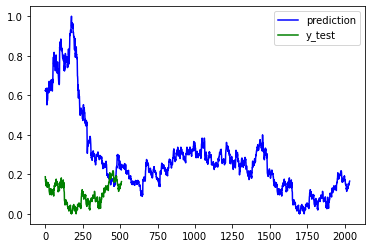

In [23]:
plt.plot(stock1,color='blue', label='prediction')
plt.plot(y_test,color='green', label='y_test')
plt.legend(loc='upper right')
plt.show()